In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


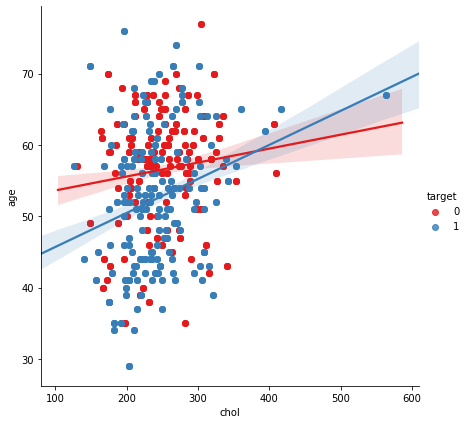

In [4]:
sns.lmplot('chol','age',data=df, hue='target',
          palette = 'Set1',height=6,aspect = 1,fit_reg=True)

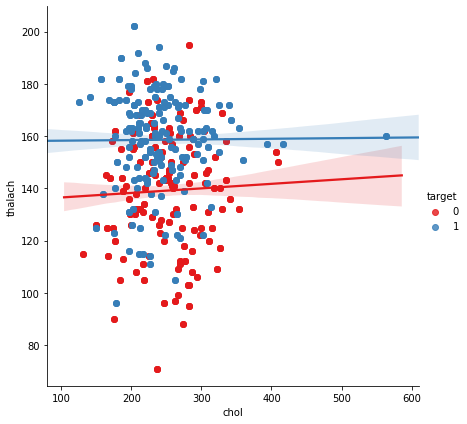

In [5]:
sns.lmplot('chol','thalach',data=df, hue='target',
          palette = 'Set1',height=6,aspect = 1,fit_reg=True)

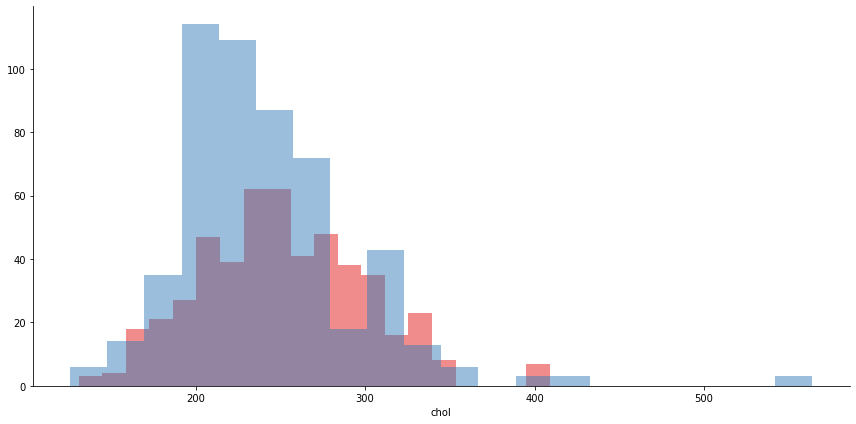

In [9]:
g =sns.FacetGrid(df,hue='target',palette='Set1',height=6,aspect=2)
g =g.map(plt.hist,'chol',bins=20,alpha=0.5)

In [6]:
df.target.value_counts()


1    526
0    499
Name: target, dtype: int64

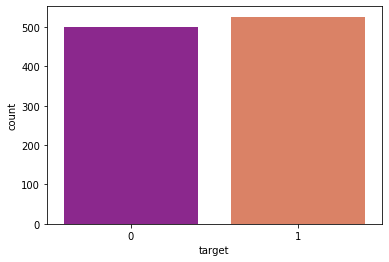

In [8]:
sns.countplot(x="target", data=df, palette="plasma")
plt.show()

In [9]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / 
                                                                      (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / 
                                                                   (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [10]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / 
                                                       (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / 
                                                     (len(df.sex))*100)))


Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


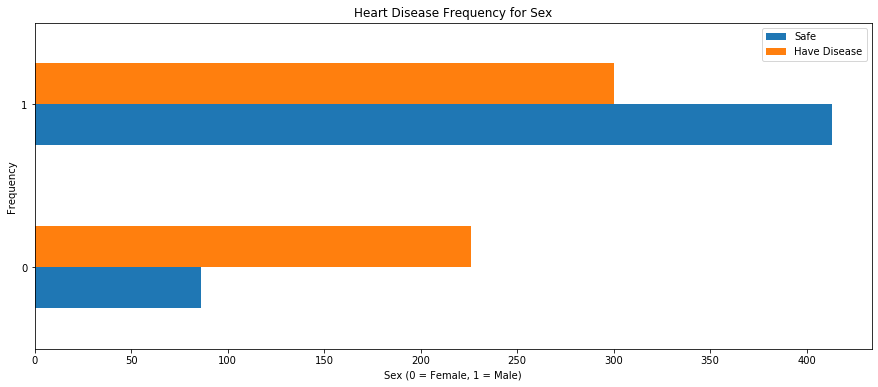

In [32]:
pd.crosstab(df.sex,df.target).plot(kind="barh",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Safe", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

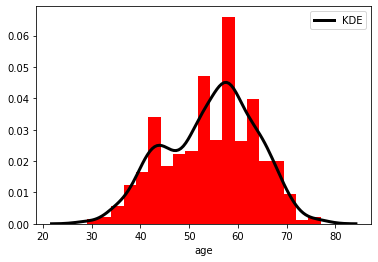

In [11]:
sns.distplot(df['age'],color='Red',hist_kws={'alpha':1,"linewidth": 3}, 
             kde_kws={"color": "k", "lw": 3, "label": "KDE"})
#Most people age is from 40 to 60

Text(0.5, 1.0, 'Thal vs Heart Disease')

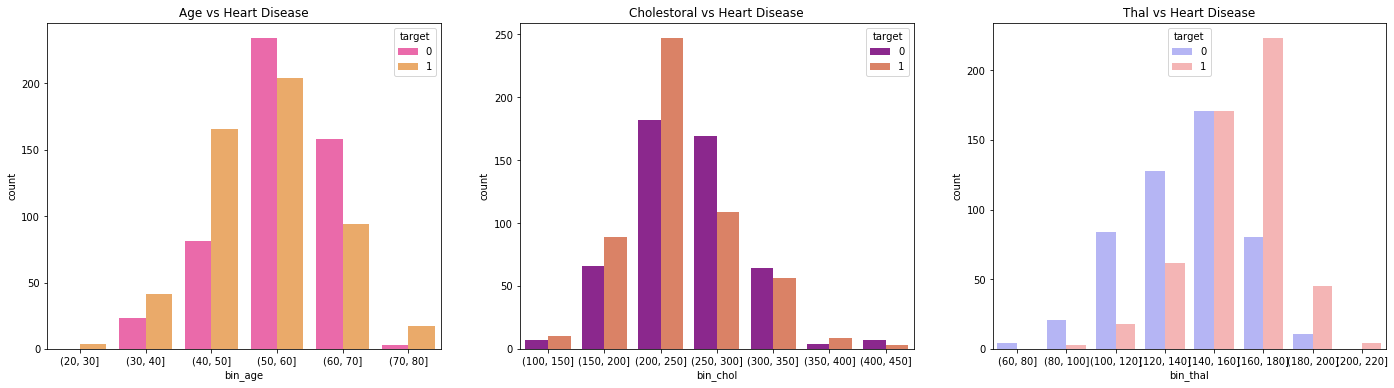

In [13]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 1)
age_bins = [20,30,40,50,60,70,80]
df['bin_age']=pd.cut(df['age'], bins=age_bins)
g1=sns.countplot(x='bin_age',data=df ,hue='target',palette='spring',linewidth=3)
g1.set_title("Age vs Heart Disease")
#The number of people with heart disease are more from the age 41-55
#Also most of the people fear heart disease and go for a checkup from age 55-65 and dont have heart disease (Precautions)
plt.subplot(1, 3, 2)
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['chol'], bins=cho_bins)
g2=sns.countplot(x='bin_chol',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Cholestoral vs Heart Disease")
#Most people get the heart disease with 200-250 cholestrol
#The others with cholestrol of above 250 tend to think they have heart disease but the rate of heart disease falls
plt.subplot(1, 3, 3)
thal_bins = [60,80,100,120,140,160,180,200,220]
df['bin_thal']=pd.cut(df['thalach'], bins=thal_bins)
g3=sns.countplot(x='bin_thal',data=df,hue='target',palette='bwr',linewidth=3)
g3.set_title("Thal vs Heart Disease")
#People who have thalach between 140-180 have a very high chance of getting the heart disease 

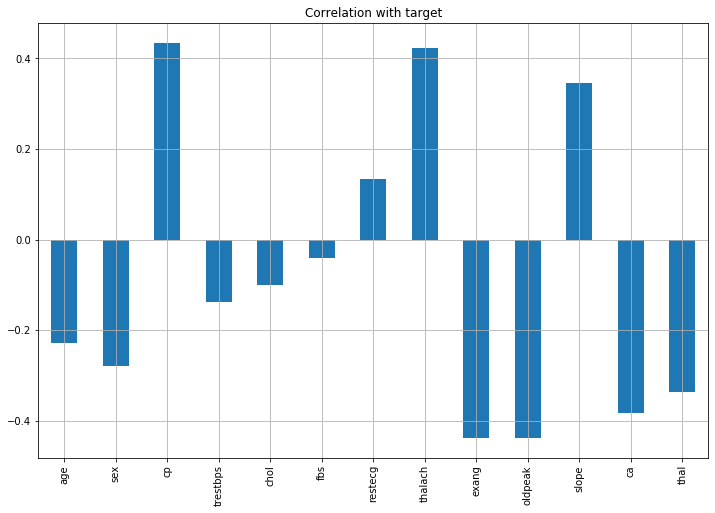

In [14]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),
 title="Correlation with target")
#fbs and chol are the lowest correlated with the target variable.
#All other variables have a significant correlation with the target variable.

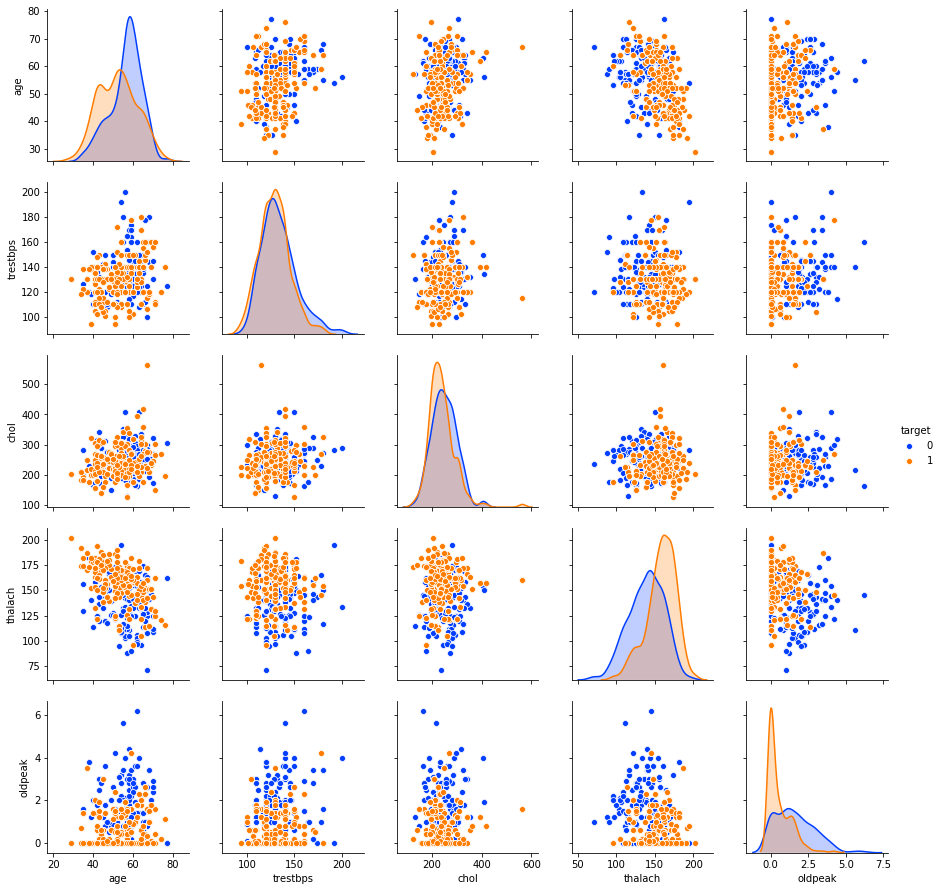

In [20]:
sns.pairplot(df, hue = 'target', vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 
             palette = sns.color_palette("bright", 10))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('target', axis = 1)
y = df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [39]:
logR.fit(X_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions = logR.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       128
           1       0.82      0.93      0.87       129

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(confusion_matrix(y_test, predictions))

[[101  27]
 [  9 120]]


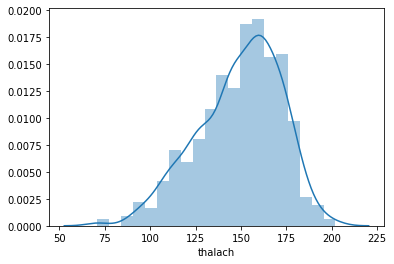

In [30]:
sns.distplot(df['thalach'])

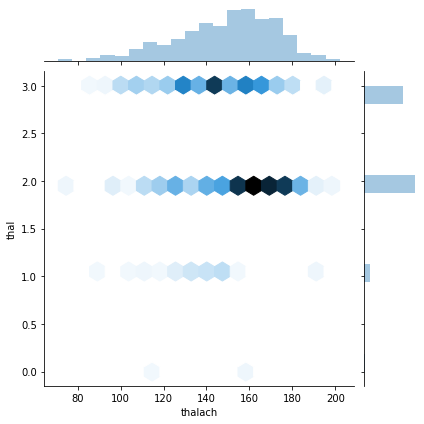

In [31]:
sns.jointplot(x='thalach',y='thal',data=df,kind='hex')

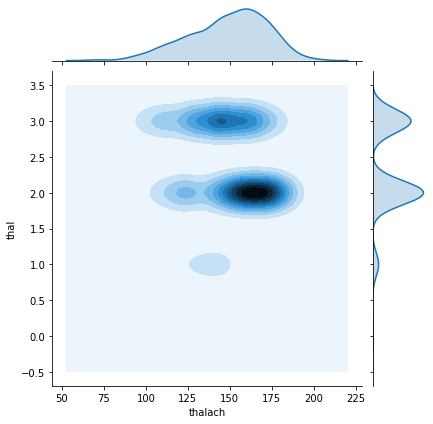

In [15]:
sns.jointplot(x='thalach',y='thal',data=df,kind='kde')

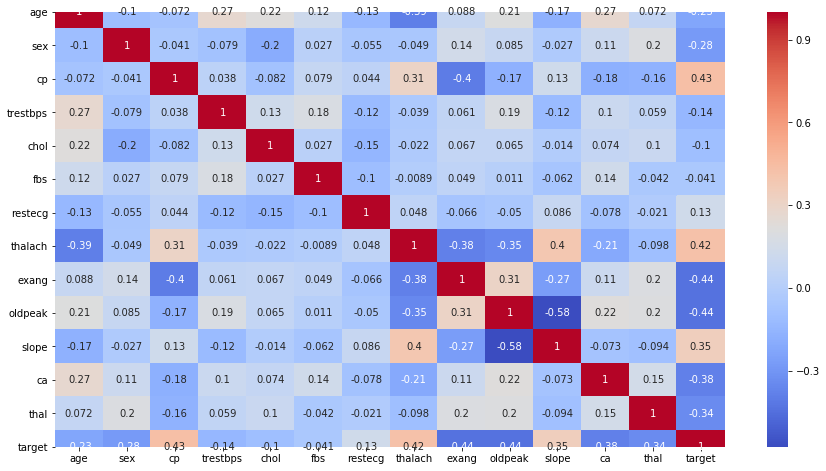

In [30]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()